#### 1-Disaster Tweets, 0-Non disaster tweets

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('disaster_tweets.csv')
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [3]:
df.shape

(7613, 5)

In [4]:
df['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [5]:
df = df[['text','target']]
df.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [6]:
import spacy 
import en_core_web_sm ## for this run conda install -c conda-forge spacy-model-en_core_web_sm in anaconda prompt

In [7]:
import text_hammer as th ##text hammer to remove the email,html tags, special character and stopwords

In [8]:
def text_preprocessing(df,col):
#     col = col_name
    df[col] = df[col].progress_apply(lambda x:str(x).lower())
    df[col] = df[col].progress_apply(lambda x: th.cont_exp(x))   
    df[col] = df[col].progress_apply(lambda x: th.remove_emails(x))
    df[col] = df[col].progress_apply(lambda x: th.remove_html_tags(x))
    df[col] = df[col].progress_apply(lambda x: th.remove_stopwords(x))
    df[col] = df[col].progress_apply(lambda x: th.remove_special_chars(x))
    df[col] = df[col].progress_apply(lambda x: th.make_base(x)) #ran -> run,
    return(df)

In [9]:
df = text_preprocessing(df, "text")

  0%|          | 0/7613 [00:00<?, ?it/s]

  0%|          | 0/7613 [00:00<?, ?it/s]

  0%|          | 0/7613 [00:00<?, ?it/s]

  0%|          | 0/7613 [00:00<?, ?it/s]

  0%|          | 0/7613 [00:00<?, ?it/s]

  0%|          | 0/7613 [00:00<?, ?it/s]

  0%|          | 0/7613 [00:00<?, ?it/s]

In [11]:
x = df['text']
y = df['target']
print(x.shape)
print(y.shape)

(7613,)
(7613,)


In [12]:
df_disaster = df[df['target']==1]
df_disaster.shape

(3271, 2)

In [13]:
from nltk import word_tokenize, FreqDist

In [14]:
wt_disaster =[]
for i in df_disaster['text']:
    wt_disaster.extend(word_tokenize(i))

freq_dist_disaster = FreqDist(wt_disaster).most_common(30)
print(freq_dist_disaster)

[('fire', 267), ('_', 200), ('kill', 155), ('news', 136), ('disaster', 118), ('people', 114), ('bomb', 113), ('crash', 112), ('california', 111), ('suicide', 110), ('police', 107), ('family', 105), ('attack', 104), ('train', 101), ('home', 100), ('like', 99), ('flood', 95), ('storm', 92), ('building', 87), ('hiroshima', 86), ('year', 84), ('burn', 81), ('wildfire', 80), ('emergency', 76), ('2', 75), ('video', 72), ('car', 71), ('accident', 71), ('mh370', 71), ('nuclear', 70)]


In [15]:
df_disaster = pd.DataFrame(freq_dist_disaster,columns=['word','count'])
df_disaster.head()

,word,count
0,fire,267
1,_,200
2,kill,155
3,news,136
4,disaster,118


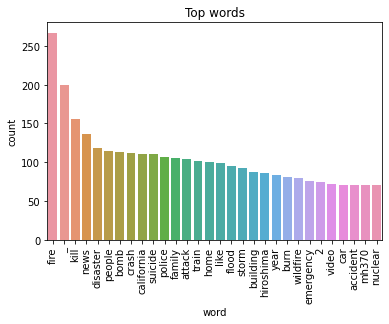

In [16]:
sns.barplot(x='word', y='count', data=df_disaster)
plt.xticks(rotation=90)
plt.title("Top words")
plt.show()

In [25]:
from wordcloud import WordCloud

In [26]:
# freq_dist_disaster = dict(freq_dist_spam)
# print(type(freq_dist_spam))
freq_dist_disaster = dict(freq_dist_disaster)
print(freq_dist_disaster)

{'fire': 267, '_': 200, 'kill': 155, 'news': 136, 'disaster': 118, 'people': 114, 'bomb': 113, 'crash': 112, 'california': 111, 'suicide': 110, 'police': 107, 'family': 105, 'attack': 104, 'train': 101, 'home': 100, 'like': 99, 'flood': 95, 'storm': 92, 'building': 87, 'hiroshima': 86, 'year': 84, 'burn': 81, 'wildfire': 80, 'emergency': 76, '2': 75, 'video': 72, 'car': 71, 'accident': 71, 'mh370': 71, 'nuclear': 70}


In [28]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [29]:
max_words = 30000 ## the no of unique words in  input data you can assume and give value here
max_len = 100

tk = Tokenizer(num_words=max_words)## here tokenizer is used to asssign the index position of unique words it can be anywhere between 0 to 299990
#based on word count index pos assigned
tk.fit_on_texts(x)

print(len(tk.word_index))
print(tk.word_counts)

20437
OrderedDict([('deed', 2), ('reason', 31), ('earthquake', 52), ('allah', 9), ('forgive', 6), ('forest', 66), ('fire', 357), ('near', 56), ('la', 26), ('ronge', 1), ('sask', 1), ('canada', 12), ('resident', 8), ('ask', 29), ('shelter', 6), ('place', 35), ('notify', 1), ('officer', 37), ('evacuation', 51), ('order', 37), ('expect', 31), ('13000', 4), ('people', 217), ('receive', 4), ('wildfire', 83), ('california', 117), ('got', 38), ('send', 52), ('photo', 66), ('ruby', 1), ('alaska', 6), ('smoke', 51), ('pour', 4), ('school', 70), ('rockyfire', 4), ('update', 56), ('hwy', 9), ('20', 26), ('closed', 6), ('direction', 15), ('lake', 16), ('county', 38), ('cafire', 2), ('flood', 139), ('disaster', 156), ('heavy', 20), ('rain', 59), ('cause', 104), ('flash', 21), ('flooding', 28), ('street', 31), ('manitou', 1), ('colorado', 16), ('spring', 18), ('area', 48), ('hill', 11), ('wood', 6), ('emergency', 158), ('happen', 53), ('building', 128), ('afraid', 5), ('tornado', 39), ('come', 157),

In [37]:
sequences = tk.texts_to_sequences(x) #here sequence give all the unique index pos of each word from sentence but 
#if you see every sentence of different length so we have to find the sentence having max length and than do padding so the length of each sentence will become equal and we pass that data for training and we all know to train data every row has equal features otherwise it will give error
print(sequences)



[[3821, 428, 193, 1317, 1782], [134, 2, 178, 527, 5763, 5764, 1070], [1442, 467, 1783, 357, 5765, 320, 199, 1783, 357, 321, 429], [2424, 5, 2425, 80, 199, 321, 39], [307, 194, 135, 5766, 1784, 200, 80, 2426, 120], [2427, 179, 39, 1318, 528, 1785, 886, 833, 308, 2, 3822, 80], [26, 16, 689, 165, 54, 661, 482, 430, 5767, 834, 751, 219], [1142, 2, 1786], [13, 199, 190, 32, 430], [2043, 294, 14, 219], [5, 97, 240, 100, 468], [690, 499, 2428, 950, 26, 2967, 322, 376, 61, 499, 2428, 4, 138, 4, 138, 5768, 482], [165, 26, 1787, 5769, 2428, 1143, 1008, 29, 272, 2968], [26, 3823, 716, 255, 752, 3823], [125, 120, 220, 1443, 3824, 50, 11, 5770], [256, 53, 27], [33, 1444], [257, 1445], [50, 500], [5771], [2429], [887, 358], [33, 3825], [2044, 29], [5772], [5773, 951, 180], [3, 469, 87, 264], [33, 1788], [5774], [1, 3826], [169], [5775, 2430, 295, 483, 5776], [145, 282, 689, 1009, 51, 5777], [5778, 92, 5779, 550, 152, 483, 952, 5780], [691, 835, 152, 483], [1446, 23, 753, 184, 483, 5781], [5782, 3827

In [36]:
max_len=max([len(x)for x in sequences])
print(max_len)


24


In [38]:
x_pad = pad_sequences(sequences,maxlen=max_len)##default pad parameter is left side paading 
print(x_pad)

[[    0     0     0 ...   193  1317  1782]
 [    0     0     0 ...  5763  5764  1070]
 [    0     0     0 ...   357   321   429]
 ...
 [    0     0     0 ...   422  1307  5730]
 [    0     0     0 ...  4486   988    91]
 [    0     0     0 ...   569     6 20437]]


In [43]:
x_pad[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0, 3821,  428,  193,
       1317, 1782])

In [39]:
x_pad.shape

(7613, 24)

In [40]:
print(len(x_pad[50]))
print(len(x_pad[213]))

24
24


In [41]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, LSTM, Embedding,Flatten
import tensorflow as tf
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [44]:
vocab_size = max_words 
embedding_dim = 100 ##each word represent by 100 features
print(vocab_size)
print(embedding_dim)
print(x_pad.shape)

30000
100
(7613, 24)


In [45]:
m1 = Sequential()
m1.add(Embedding(vocab_size,embedding_dim,input_length=x_pad.shape[1]))    ##embedding layer converting word to vector through neural network
m1.add(LSTM(200, return_sequences=True)) #here lstm input is dimension size * input size(100 * 24) and 200 is no of neuons/hidden state/units in lstm layers
m1.add(Dropout(0.5))
m1.add(LSTM(200,return_sequences=True))## retuen sequence = True means we are send data to the next lstm layer 
m1.add(Dropout(0.5))
m1.add(LSTM(200))
m1.add(Dropout(0.5))
m1.add(Dense(128))
m1.add(Dropout(0.5))
m1.add(Dense(1,activation='sigmoid'))##output layer 

m1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])

In [46]:
h1 = m1.fit(x_pad,y,batch_size=64,epochs=5)##batch size=train the network by taking fiest 64 data and then again train next 64

Epoch 1/5
119/119 [==============================] - 32s 180ms/step - loss: 0.5381 - acc: 0.7236
Epoch 2/5
119/119 [==============================] - 24s 204ms/step - loss: 0.2893 - acc: 0.8841
Epoch 3/5
119/119 [==============================] - 23s 192ms/step - loss: 0.1439 - acc: 0.9486
Epoch 4/5
119/119 [==============================] - 27s 228ms/step - loss: 0.0713 - acc: 0.9765
Epoch 5/5
119/119 [==============================] - 24s 201ms/step - loss: 0.0459 - acc: 0.9859


In [47]:
m1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 24, 100)           3000000   
                                                                 
 lstm (LSTM)                 (None, 24, 200)           240800    
                                                                 
 dropout (Dropout)           (None, 24, 200)           0         
                                                                 
 lstm_1 (LSTM)               (None, 24, 200)           320800    
                                                                 
 dropout_1 (Dropout)         (None, 24, 200)           0         
                                                                 
 lstm_2 (LSTM)               (None, 200)               320800    
                                                                 
 dropout_2 (Dropout)         (None, 200)               0

In [48]:
r1 = pd.DataFrame(h1.history)
r1['Epochs'] = h1.epoch
r1.tail()

,loss,acc,Epochs
0,0.538107,0.723631,0
1,0.289341,0.884146,1
2,0.143871,0.948640,2
3,0.071286,0.976488,3
4,0.045932,0.985945,4


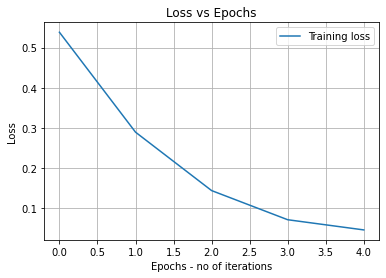

In [49]:
plt.plot(r1['Epochs'],r1['loss'],label='Training loss')
# plt.plot(r1['Epochs'],r1['val_loss'],label='Testing loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs - no of iterations')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

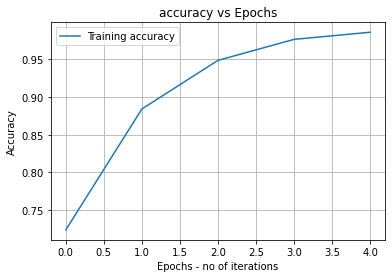

In [50]:
plt.plot(r1['Epochs'],r1['acc'],label='Training accuracy')
# plt.plot(r1['Epochs'],r1['val_accuracy'],label='Testing accuracy')
plt.title('accuracy vs Epochs')
plt.xlabel('Epochs - no of iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [51]:
df0 = df[df['target']==0]
df1 = df[df['target']==1]
print(df0.shape)
print(df1.shape)

(4342, 2)
(3271, 2)


In [52]:
df0['text'][:5]

15         what s man
16         love fruit
17      summer lovely
18           car fast
19    goooooooaaaaaal
Name: text, dtype: object

In [53]:
df1['text'][:20]

0                  deed reason earthquake allah forgive
1                 forest fire near la ronge sask canada
2     resident ask shelter place notify officer evac...
3     13000 people receive wildfire evacuation order...
4     got send photo ruby alaska smoke wildfire pour...
5     rockyfire update california hwy 20 closed dire...
6     flood disaster heavy rain cause flash flooding...
7                                        hill fire wood
8           emergency evacuation happen building street
9                              afraid tornado come area
10                             people die heat wave far
11    haha south tampa getting flood hah wait second...
12    rain flood florida tampabay tampa 18 19 day lo...
13                    flood bago myanmar we arrive bago
14        damage school bus 80 multi car crash breaking
31     bbcmtd wholesale market ablaze httptcolhyxeohy6c
33    africanbaze break newsnigeria flag set ablaze ...
37        inec office abia set ablaze httptco3im

In [54]:
df1['text'][1]

'forest fire near la ronge sask canada'

In [61]:
def predict_tweets_emotion(msg):
    seq = tk.texts_to_sequences(msg)
    pad = pad_sequences(seq, maxlen=24)
    print(pad.shape)
    pred = m1.predict(pad)
    pred_res = [1 if i>0.5 else 0 for i in pred]
    print('pred',pred)
    print('pred_res',pred_res)

In [62]:
msg1 = ['Forest fire near Maharashtra']
predict_tweets_emotion(msg1)

(1, 24)
1/1 [==============================] - 2s 2s/step
pred [[0.9802657]]
pred_res [1]


In [63]:
msg3 = ['coffee on a rainy day tastes amazing']
predict_tweets_emotion(msg3)

(1, 24)
1/1 [==============================] - 0s 31ms/step
pred [[0.06309523]]
pred_res [0]


In [68]:
predict_tweets_emotion(df['text'])

(7613, 24)
238/238 [==============================] - 7s 30ms/step
pred [[0.95684004]
 [0.99997383]
 [0.9999009 ]
 ...
 [1.        ]
 [0.99997807]
 [1.        ]]
pred_res [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 